In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Activation,Dropout,Flatten,MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils

%matplotlib inline

In [76]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [22]:
print(x_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


In [23]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

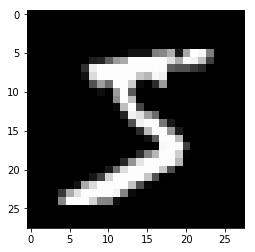

In [24]:
fig = plt.figsize=(2,2)
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [25]:
# Converting to tensor
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float64')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float64')
# Normalizing
x_train = x_train/255
x_test = x_test/255
# Converting to one hot encoding
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [33]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [36]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.fit(x_train,y_train,
         batch_size=128,
         nb_epoch=10,
         verbose=1,
         validation_data=(x_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.2495 - acc: 0.9232 - val_loss: 0.0539 - val_acc: 0.9827
Epoch 2/10
60000/60000 [==============================] - 210s 4ms/step - loss: 0.0885 - acc: 0.9739 - val_loss: 0.0369 - val_acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0653 - acc: 0.9806 - val_loss: 0.0347 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0567 - acc: 0.9831 - val_loss: 0.0335 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0293 - val_acc: 0.9905
Epoch 6/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.0410 - acc: 0.9865 - val_loss: 0.0262 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0357 - acc: 0.9883 - val_loss: 0.0275 - 

In [40]:
score = model.evaluate(x_test,y_test)
print("Classification Accuracy",score[1])

10000/10000 [==============================] - 6s 649us/step
Classification Accuracy 0.9919


In [61]:
pred1 = model.predict_classes(x_test,batch_size=128,verbose=1)


10000/10000 [==============================] - 6s 558us/step


In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
con = confusion_matrix(y_test,pred1)

In [79]:
print(con)

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    6 1019    0    1    0    0    5    0    0]
 [   0    0    0 1009    0    0    0    0    1    0]
 [   0    0    0    0  972    0    5    0    0    5]
 [   1    0    0    6    0  883    1    0    1    0]
 [   1    2    0    1    1    3  950    0    0    0]
 [   0    4    3    0    0    0    0 1019    1    1]
 [   3    1    0    1    0    0    0    2  966    1]
 [   0    2    0    1    6    3    0    6    3  988]]


In [82]:
cla = classification_report(y_test,pred1)
print(cla)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

